**Practical no.7**

**Logistic Regression and Decision Tree**

**a) Build a logistic regression model to predict a binary outcome.**

**b) Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).**

**c) Construct a decision tree model and interpret the decision rules for
classification.**

**T114 | Bhumika Shelar**

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
df = pd. read_csv('/content/Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [11]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Daily_Screen_Time(hrs),0
Sleep_Quality(1-10),0
Stress_Level(1-10),0
Days_Without_Social_Media,0
Exercise_Frequency(week),0
Social_Media_Platform,0
Happiness_Index(1-10),0


In [12]:
df = df.dropna()

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)
# Initialize label encoder
le = LabelEncoder()
# Encode all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())

Categorical columns: Index(['User_ID', 'Gender', 'Social_Media_Platform'], dtype='object')
   User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0        0   44       1                     3.1                  7.0   
1        1   30       2                     5.1                  7.0   
2        2   23       2                     7.4                  6.0   
3        3   36       0                     5.7                  7.0   
4        4   34       0                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0                        5.0                       1.0   

   Soci

In [21]:
y = df['Stress_Level(1-10)']
X = df.drop(['Stress_Level(1-10)'], axis=1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Transformer
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


In [28]:
from sklearn.preprocessing import StandardScaler

# Scale X to create X_scaled with consistent samples
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split using the newly created X_scaled and y
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model: Use DecisionTreeClassifier for classification task
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict using the trained classifier
y_pred = clf.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Test accuracy
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.27


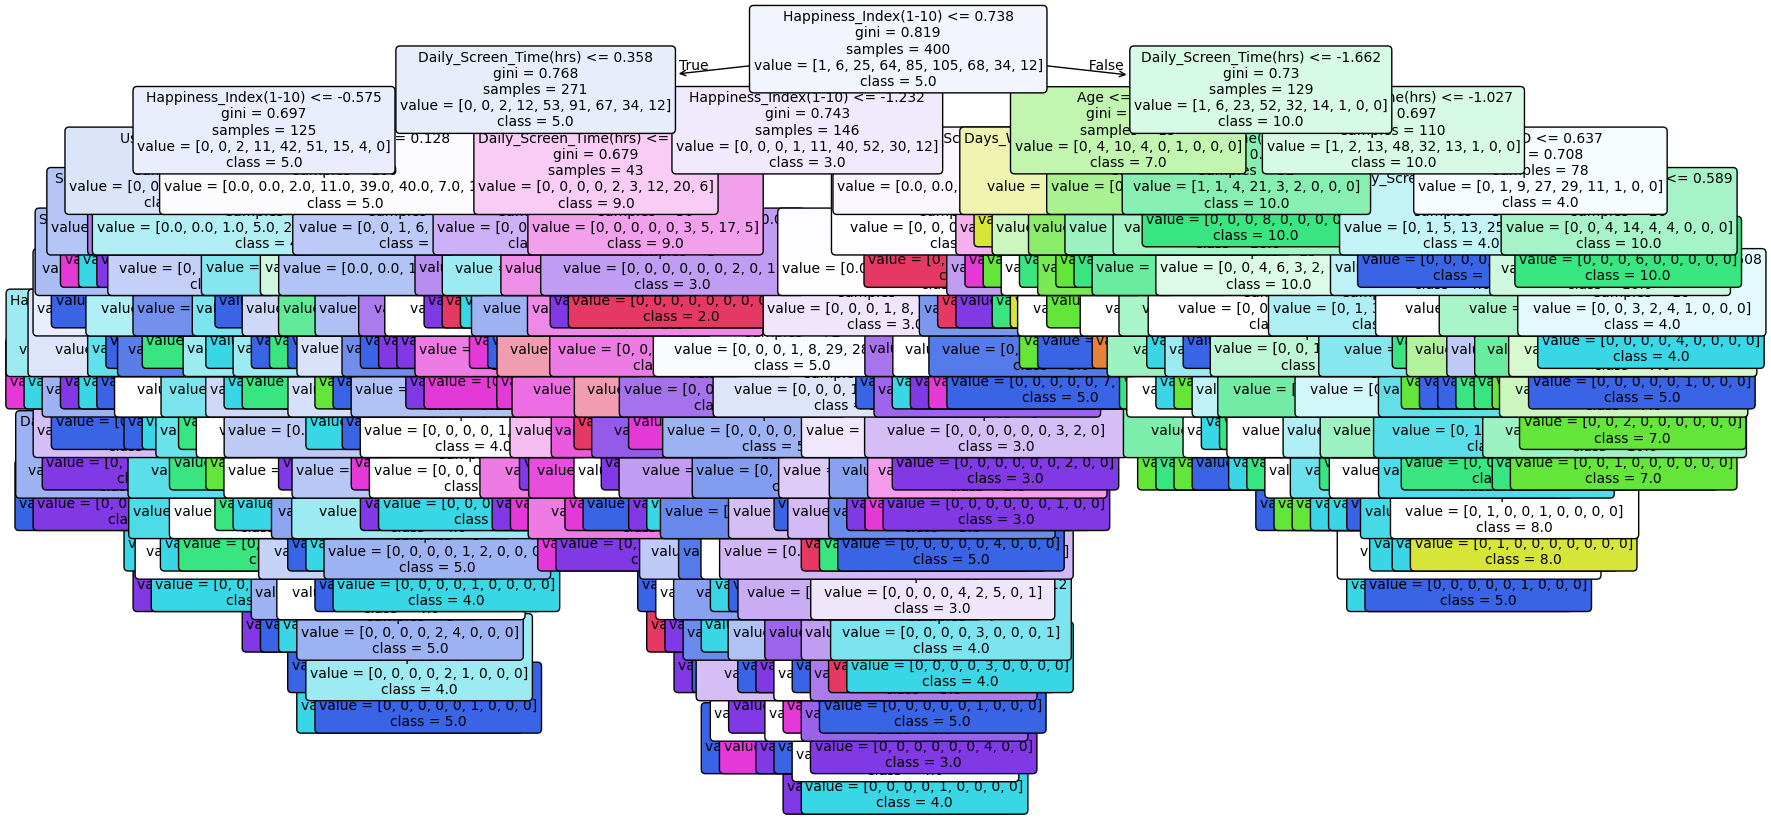

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=y.astype(str).unique(), # Use unique string values from y as class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

=== Training Set Evaluation ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         6
         4.0       1.00      1.00      1.00        25
         5.0       1.00      1.00      1.00        64
         6.0       1.00      1.00      1.00        85
         7.0       1.00      1.00      1.00       105
         8.0       1.00      1.00      1.00        68
         9.0       1.00      1.00      1.00        34
        10.0       1.00      1.00      1.00        12

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



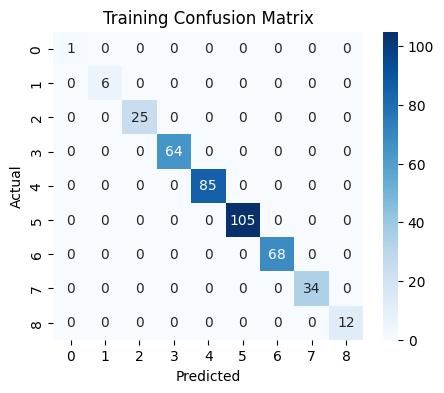


=== Testing Set Evaluation ===
Accuracy: 0.27
Classification Report:
               precision    recall  f1-score   support

         3.0       0.67      0.50      0.57         4
         4.0       0.30      0.43      0.35         7
         5.0       0.23      0.25      0.24        12
         6.0       0.30      0.25      0.27        24
         7.0       0.27      0.25      0.26        24
         8.0       0.40      0.29      0.33        21
         9.0       0.09      0.17      0.12         6
        10.0       0.00      0.00      0.00         2

    accuracy                           0.27       100
   macro avg       0.28      0.27      0.27       100
weighted avg       0.30      0.27      0.28       100



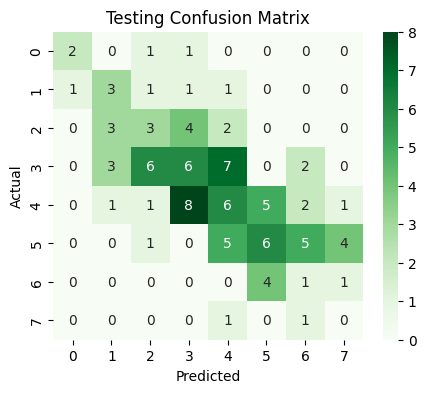

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on training set
y_train_pred = clf.predict(X_train)

# Predict on testing set
y_test_pred = clf.predict(X_test)

# --- Training Evaluation ---
print("=== Training Set Evaluation ===")
train_acc = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_acc)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Confusion matrix for training
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Testing Evaluation ---
print("\n=== Testing Set Evaluation ===")
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix for testing
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training ROC-AUC: 1.0
Testing ROC-AUC: 0.7685668406262546


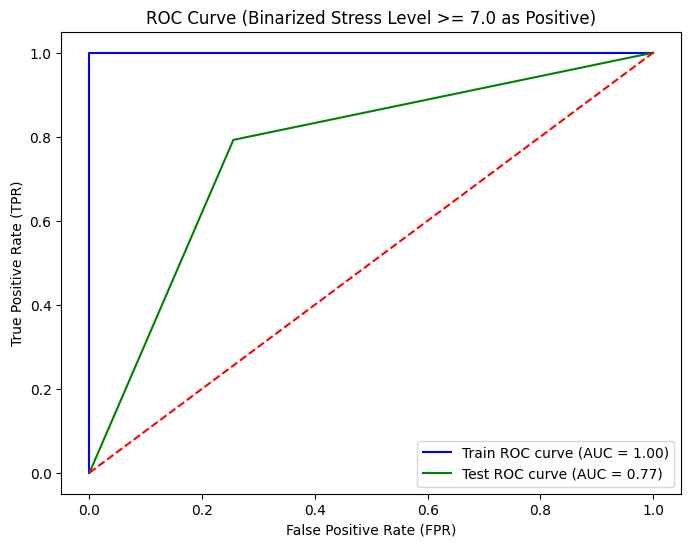

In [34]:
#finding true positive rate and false positive rate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels for ROC curve calculation (e.g., Stress_Level >= 7.0 is 'high stress' = 1)
y_train_binary = (y_train >= 7.0).astype(int)
y_test_binary = (y_test >= 7.0).astype(int)

# Get predicted probabilities for all classes from the multiclass classifier
all_train_probs = clf.predict_proba(X_train)
all_test_probs = clf.predict_proba(X_test)

# Map original class labels to their column indices in clf.predict_proba output
class_to_idx = {cls_label: i for i, cls_label in enumerate(clf.classes_)}

# Identify indices of original classes that are considered 'positive' in the binary context (e.g., >= 7.0)
positive_original_class_indices = [
    class_to_idx[cls_label] for cls_label in clf.classes_ if cls_label >= 7.0
]

# Sum probabilities for the 'positive' binary class
# This creates the y_score needed for roc_curve
if positive_original_class_indices:
    y_train_prob = np.sum(all_train_probs[:, positive_original_class_indices], axis=1)
    y_test_prob = np.sum(all_test_probs[:, positive_original_class_indices], axis=1)
else:
    # Fallback if no classes meet the positive criteria (e.g., if all stress levels were < 7.0)
    y_train_prob = np.zeros(len(y_train))
    y_test_prob = np.zeros(len(y_test))

# Compute FPR, TPR for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute FPR, TPR for testing set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print AUC
print("Training ROC-AUC:", roc_auc_train)
print("Testing ROC-AUC:", roc_auc_test)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Binarized Stress Level >= 7.0 as Positive)")
plt.legend(loc="lower right")
plt.show()

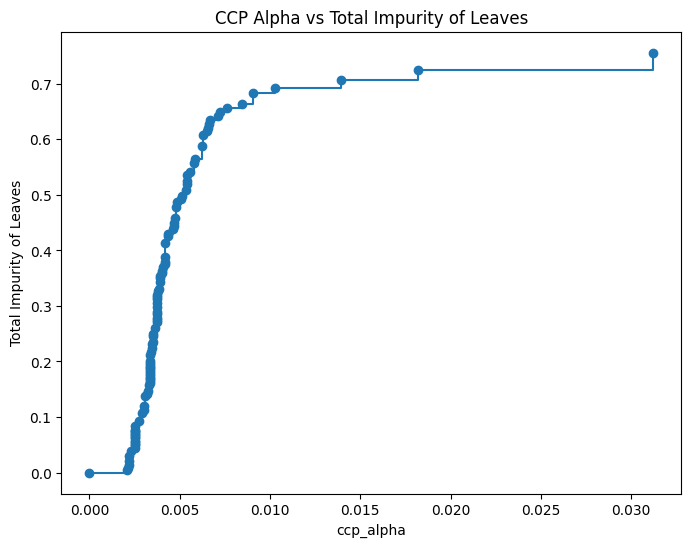

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Get the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Remove the last alpha
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]
# Plot alpha vs total leaf impurities
plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("CCP Alpha vs Total Impurity of Leaves")
plt.show()

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Get cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Remove the last element (tree pruned to root)
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

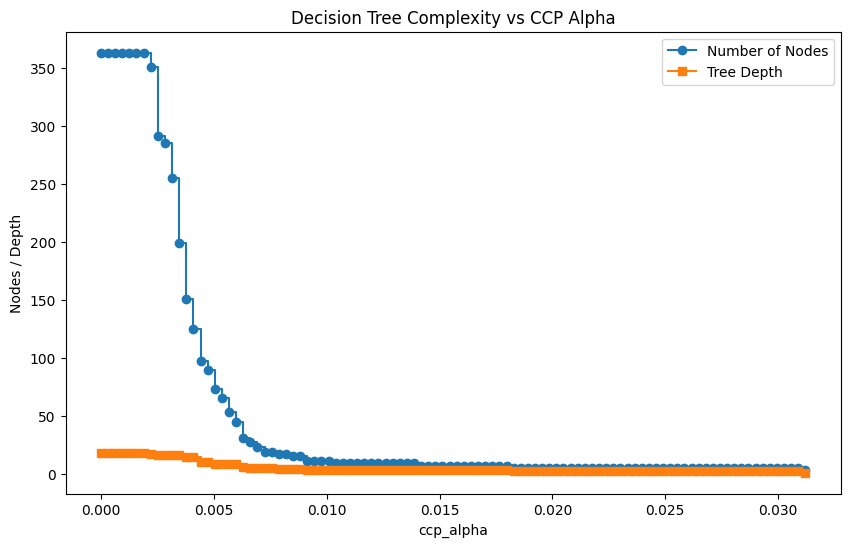

In [37]:
import numpy as np
sampled_alphas = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 100)
clfs = []
for alpha in sampled_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    clfs.append(dt)
# Collect metrics
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(sampled_alphas, node_counts, marker='o', label="Number of Nodes", drawstyle="steps-post")
ax1.plot(sampled_alphas, depth, marker='s', label="Tree Depth", drawstyle="steps-post")
ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("Nodes / Depth")
ax1.set_title("Decision Tree Complexity vs CCP Alpha")
ax1.legend()
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_index = np.argmax(test_scores)
best_alpha = sampled_alphas[best_index]
# Train the pruned tree
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00914195349848893),
                       random_state=42)

In [39]:
# Training accuracy
train_accuracy = pruned_clf.score(X_train, y_train)
print("Training Accuracy after pruning:", train_accuracy)

# Testing accuracy
test_accuracy = pruned_clf.score(X_test, y_test)
print("Testing Accuracy after pruning:", test_accuracy)


Training Accuracy after pruning: 0.4275
Testing Accuracy after pruning: 0.36


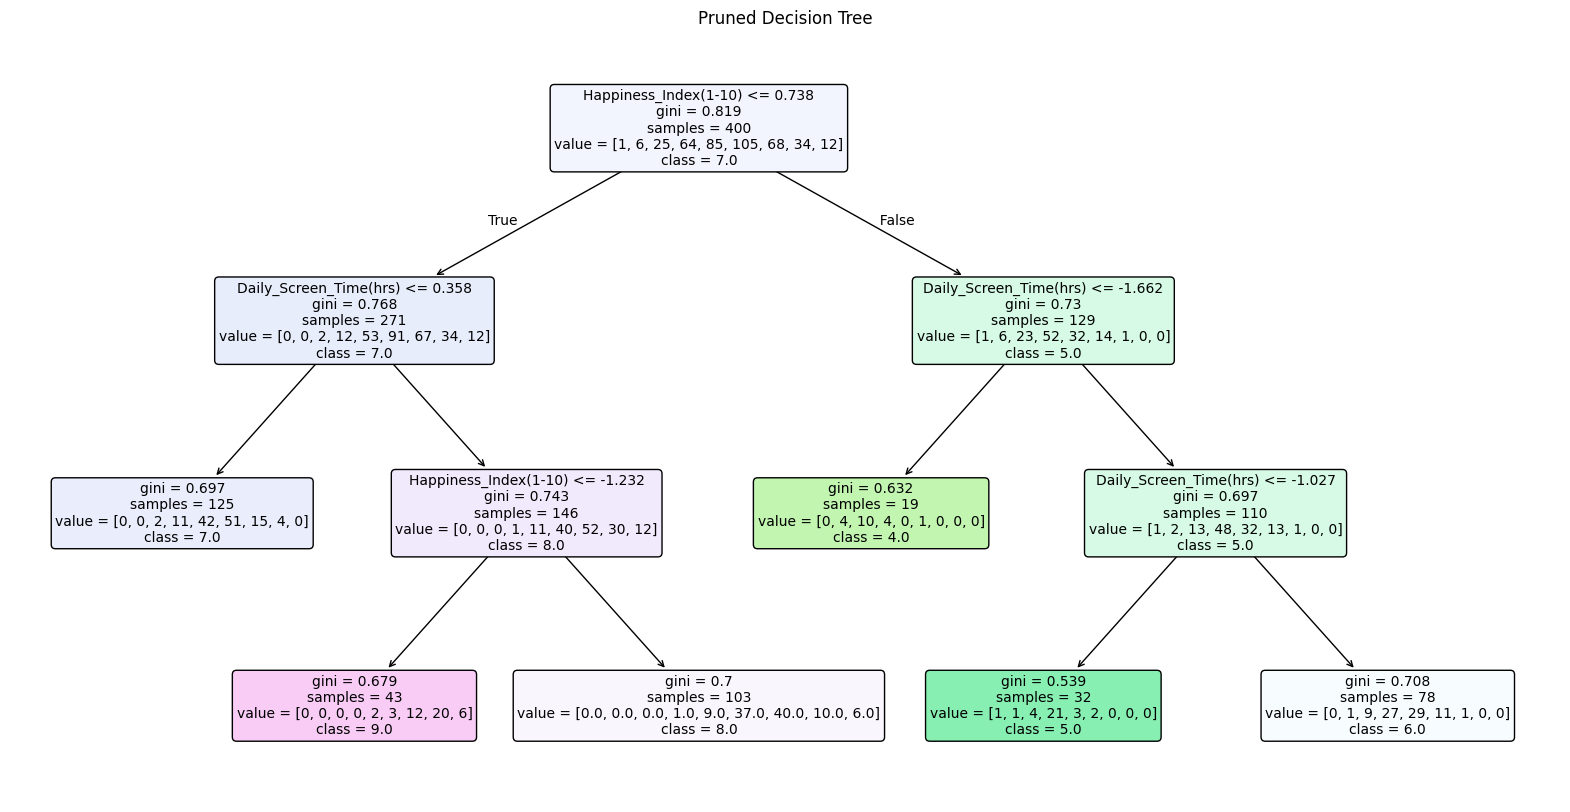

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the pruned decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    pruned_clf,
    feature_names=X.columns,
    class_names=[str(c) for c in pruned_clf.classes_], # Use classes learned by pruned_clf
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pruned Decision Tree")
plt.show()